In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
Influenza = 'Influenza Raw Data 2008-2010 Americas Region .csv'


# Read the data and the study results
influenza_data= pd.read_csv(Influenza)
influenza_data.head()


,Country,Americas,WHOREGION,FLUREGION,Year,Week,Weather,Classification of Population,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
0,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,1,Hot Weather,Low,12/31/2007,1/6/2008,NaN,19.0,0.0,NaN,0.0,19.0,No Activity
1,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,2,Hot Weather,Low,1/7/2008,1/13/2008,NaN,21.0,0.0,NaN,0.0,21.0,No Activity
2,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,3,Hot Weather,Low,1/14/2008,1/20/2008,NaN,27.0,0.0,NaN,0.0,27.0,No Activity
3,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,4,Hot Weather,Low,1/21/2008,1/27/2008,NaN,25.0,0.0,NaN,0.0,25.0,No Activity
4,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,5,Hot Weather,Low,1/28/2008,2/3/2008,NaN,26.0,0.0,NaN,0.0,26.0,No Activity


In [14]:
#Replace Nan values with 0 to make a better plot
influenza_data= influenza_data.fillna(0)
influenza_data

,Country,Americas,WHOREGION,FLUREGION,Year,Week,Weather,Classification of Population,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
0,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,1,Hot Weather,Low,12/31/2007,1/6/2008,0.0,19.0,0.0,0.0,0.0,19.0,No Activity
1,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,2,Hot Weather,Low,1/7/2008,1/13/2008,0.0,21.0,0.0,0.0,0.0,21.0,No Activity
2,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,3,Hot Weather,Low,1/14/2008,1/20/2008,0.0,27.0,0.0,0.0,0.0,27.0,No Activity
3,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,4,Hot Weather,Low,1/21/2008,1/27/2008,0.0,25.0,0.0,0.0,0.0,25.0,No Activity
4,Argentina,SA,Region of the Americas of WHO,Temperate South America,2008,5,Hot Weather,Low,1/28/2008,2/3/2008,0.0,26.0,0.0,0.0,0.0,26.0,No Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,Uruguay,SA,Region of the Americas of WHO,Temperate South America,2010,48,Hot Weather,Low,11/29/2010,12/5/2010,0.0,34.0,0.0,0.0,4.0,30.0,No Report
2351,Uruguay,SA,Region of the Americas of WHO,Temperate South America,2010,49,Hot Weather,Low,12/6/2010,12/12/2010,0.0,25.0,0.0,0.0,2.0,23.0,No Report
2352,Uruguay,SA,Region of the Americas of WHO,Temperate South America,2010,50,Hot Weather,Low,12/13/2010,12/19/2010,0.0,15.0,0.0,0.0,1.0,14.0,No Report
2353,Uruguay,SA,Region of the Americas of WHO,Temperate South America,2010,51,Hot Weather,Low,12/20/2010,12/26/2010,0.0,21.0,0.0,0.0,1.0,20.0,No Report


In [15]:
influenza_new= influenza_data[["Country", "Classification of Population", "ALL_INF2", "AH1N12009" ]]
groupby_influenza= influenza_new.groupby(["Country", "Classification of Population"])
# groupby_influenza= groupby_influenza.count()
groupby_influenza= groupby_influenza["ALL_INF2", "AH1N12009"].sum().reset_index()
groupby_influenza= groupby_influenza.sort_values(by= "ALL_INF2", ascending= False)
 #Create a new dictionary equivalent to the population density so as to sort data
custom_dict= {"High": 0, "Medium": 1, "Low":2}
groupby_influenza["Population Density Rank"]= groupby_influenza["Classification of Population"].map(custom_dict)
groupby_influenza= groupby_influenza.sort_values("Population Density Rank")
# groupby_influenza= groupby_influenza.set_index("Country")
groupby_influenza



,Country,Classification of Population,ALL_INF2,AH1N12009,Population Density Rank
10,Mexico,High,91824.0,72573.0,0
6,Cuba,High,13969.0,1797.0,0
5,Costa Rica,High,9945.0,757.0,0
7,Ecuador,High,9030.0,1732.0,0
9,Honduras,High,3233.0,780.0,0
3,Chile,Medium,70951.0,4508.0,1
4,Colombia,Medium,20082.0,2524.0,1
1,Brazil,Medium,15578.0,2218.0,1
12,Peru,Medium,10139.0,611.0,1
13,United States of America,Medium,0.0,110332.0,1


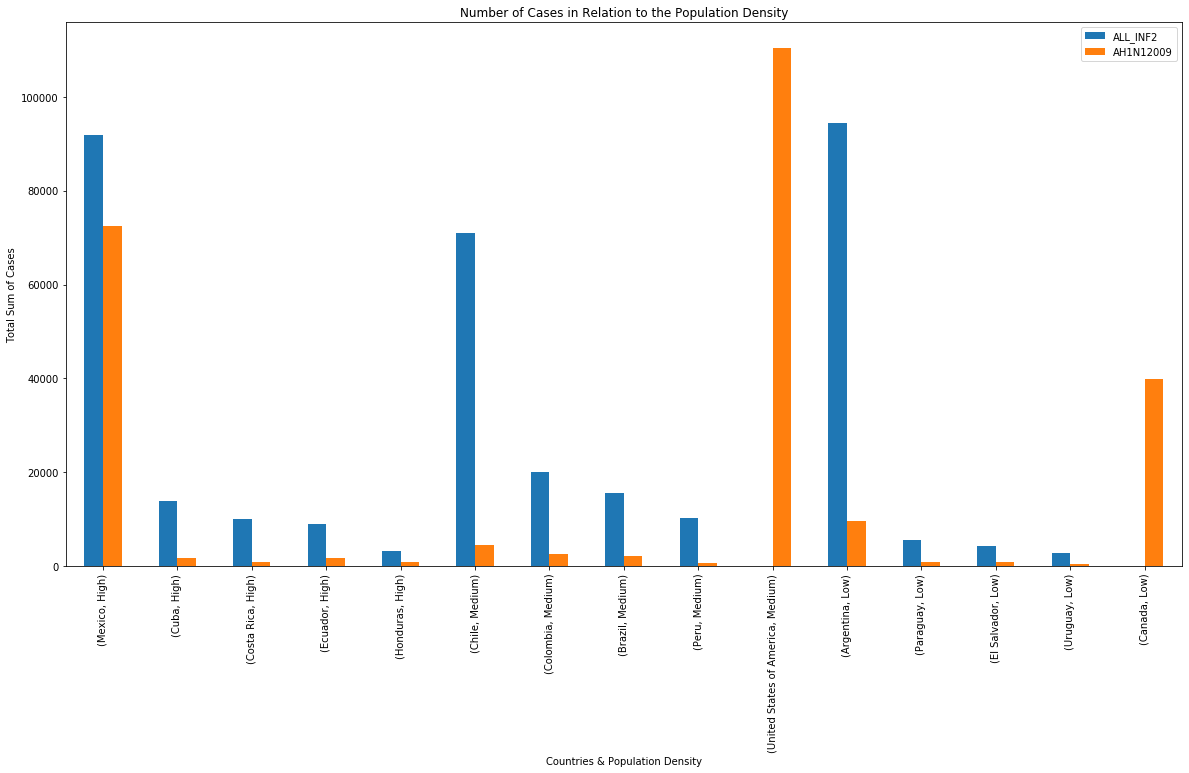

In [16]:
#Drop Population Density Rank Column
groupby_influenza= groupby_influenza.drop('Population Density Rank', 1)
# Configure plot and ticks
population_pivot_index = groupby_influenza.set_index(['Country', 'Classification of Population'])
population_pivot_index.plot(kind = "bar", figsize=(20,10), legend=True)
plt.xlabel("Countries & Population Density")
plt.ylabel("Total Sum of Cases")
plt.title("Number of Cases in Relation to the Population Density")
#Save Graph
plt.savefig('Output/Number of Cases in Relation to the Population Density.png')